#Importar librerías

In [2160]:
!pip install mplfinance
import mplfinance as mpl


# Datos
import numpy as np
import pandas as pd
from math import sqrt
import scipy.stats as stats

# Visualizacion
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from random import random
from IPython.display import display
pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

# Preprocessing
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from scipy import stats 
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer

# Modelos
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import svm

# Evaluacion
from sklearn.metrics import mean_absolute_error, roc_auc_score, roc_curve, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score

from fbprophet import Prophet

import warnings
warnings.filterwarnings("ignore")

warnings.filterwarnings("ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Importamos archivos

In [2161]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2162]:
df_train = pd.read_csv('/content/drive/MyDrive/Hackaton-CBKTech/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Hackaton-CBKTech/test_x.csv')
df_tweets = pd.read_csv('/content/drive/MyDrive/Hackaton-CBKTech/tweets_from2015_#Ibex35.csv')

#Analizamos datasets

###Train

In [2163]:
df_train.info() #hay fechas con valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6554 entries, 0 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6554 non-null   object 
 1   Open       6421 non-null   float64
 2   High       6421 non-null   float64
 3   Low        6421 non-null   float64
 4   Close      6421 non-null   float64
 5   Adj Close  6421 non-null   float64
 6   Volume     6421 non-null   float64
 7   Target     6554 non-null   int64  
dtypes: float64(6), int64(1), object(1)
memory usage: 409.8+ KB


In [2164]:
df_train.describe()

,Open,High,Low,Close,Adj Close,Volume,Target
count,6421.000000,6421.000000,6421.000000,6421.000000,6421.000000,6.421000e+03,6554.000000
mean,8936.540448,9005.235576,8858.340567,8934.978558,8934.970624,8.218074e+07,0.516936
std,2732.102441,2749.009324,2712.511028,2731.032625,2731.030170,1.231845e+08,0.499751
min,2865.100098,2877.300049,2833.600098,2865.100098,2865.097168,0.000000e+00,0.000000
25%,7732.399902,7817.200195,7641.500000,7727.799805,7727.791992,0.000000e+00,0.000000
50%,9329.700195,9404.599609,9243.000000,9331.000000,9331.000000,1.966000e+05,1.000000
75%,10525.500000,10590.299805,10441.200195,10523.400391,10523.400391,1.773980e+08,1.000000
max,15999.200195,16040.400391,15868.599609,15945.700195,15945.683594,7.894902e+08,1.000000


In [2165]:
df_train.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Target
0,1994-01-03,3615.199951,3654.699951,3581.000000,3654.500000,3654.496338,0.0,0
1,1994-01-04,3654.500000,3675.500000,3625.100098,3630.300049,3630.296387,0.0,1
2,1994-01-05,3625.199951,3625.199951,3583.399902,3621.199951,3621.196289,0.0,1
3,1994-01-06,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1994-01-07,3621.199951,3644.399902,3598.699951,3636.399902,3636.396240,0.0,1


In [2166]:
df_train['Volume'].value_counts()

0.0            1649
114400.0          9
108000.0          9
140000.0          9
132000.0          8
               ... 
230920000.0       1
191595000.0       1
178801000.0       1
268613000.0       1
101389200.0       1
Name: Volume, Length: 3546, dtype: int64

In [2167]:
df_train.isnull().sum()

Date           0
Open         133
High         133
Low          133
Close        133
Adj Close    133
Volume       133
Target         0
dtype: int64

In [2168]:
#Sustituimos los valores nulos por los valores de próxima fila que no contenga nulo
df_train.fillna(method = 'backfill', inplace =True)

In [2169]:
df_train.shape

(6554, 8)

In [2170]:
df_train.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Target       0
dtype: int64

In [2171]:
#Las primeras filas tienen valores iguales a 0 en la columna 'Volume', las eliminamos

In [2172]:
no_volume = df_train['Volume'] == 0.0

In [2173]:
df_train.drop(df_train[df_train['Volume'] == 0.0].index, inplace = True)

In [2174]:
#Covertimos 'Date' a tipo fecha
df_train['Date'] = pd.to_datetime(df_train['Date'], format= '%Y-%M-%d')

In [2175]:
df_train.info()
df_train.set_index('Date', inplace = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4828 entries, 1710 to 6553
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       4828 non-null   datetime64[ns]
 1   Open       4828 non-null   float64       
 2   High       4828 non-null   float64       
 3   Low        4828 non-null   float64       
 4   Close      4828 non-null   float64       
 5   Adj Close  4828 non-null   float64       
 6   Volume     4828 non-null   float64       
 7   Target     4828 non-null   int64         
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 339.5 KB


# Visualizamos

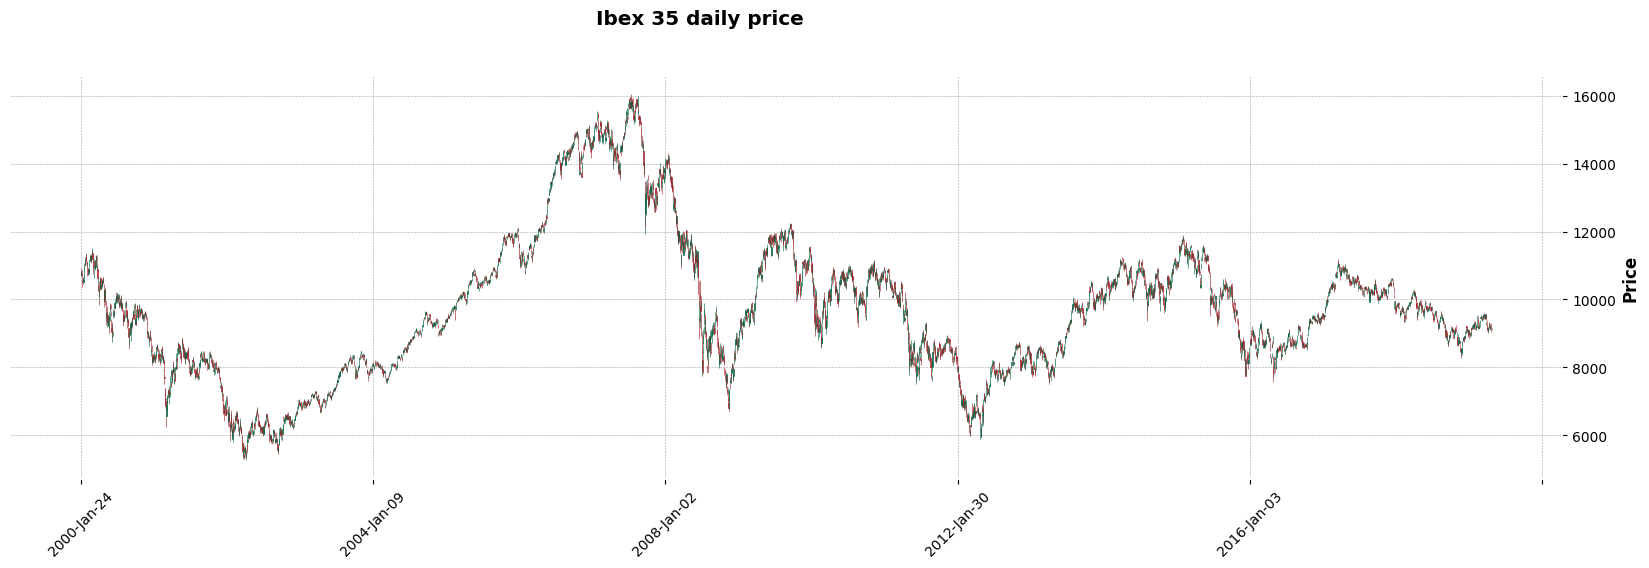

In [2176]:
mpl.plot(df_train, type= 'candle', style = 'charles', title = 'Ibex 35 daily price', ylabel = 'Price', figratio=(30,8))

In [2177]:
corr = df_train.corr()['Close']

In [2178]:
corr

Open         0.998351
High         0.999192
Low          0.999278
Close        1.000000
Adj Close    1.000000
Volume      -0.108231
Target      -0.006895
Name: Close, dtype: float64

In [2179]:
corr1= df_train.corr()

In [2180]:
corr1.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close,Adj Close,Volume,Target
Open,1.000000,0.999365,0.999113,0.998351,0.998351,-0.107028,-0.007327
High,0.999365,1.000000,0.998946,0.999192,0.999192,-0.105654,-0.007330
Low,0.999113,0.998946,1.000000,0.999278,0.999278,-0.109935,-0.007023
Close,0.998351,0.999192,0.999278,1.000000,1.000000,-0.108231,-0.006895
Adj Close,0.998351,0.999192,0.999278,1.000000,1.000000,-0.108231,-0.006895
Volume,-0.107028,-0.105654,-0.109935,-0.108231,-0.108231,1.000000,0.014497
Target,-0.007327,-0.007330,-0.007023,-0.006895,-0.006895,0.014497,1.000000


In [2181]:
#Quitamos columna 'Close'
df_train.drop('Close', axis = 1, inplace= True)

In [2182]:
#Añadimos dos nuevas columnas
df_train['Dif_Open_Close'] = (df_train['Adj Close'] - df_train['Open'])

In [2183]:
df_train['MA3'] = df_train['Adj Close'].rolling (3).mean()

In [2184]:
df_train.fillna(method = 'backfill', inplace =True)

In [2185]:
df_train.head()

,Open,High,Low,Adj Close,Volume,Target,Dif_Open_Close,MA3
Date,,,,,,,,
2000-01-24 00:07:00,10879.599609,10924.400391,10812.500000,10831.489258,5545600.0,0,-48.110351,10763.289063
2000-01-25 00:07:00,10831.500000,10842.200195,10703.400391,10714.588867,7368000.0,0,-116.911133,10763.289063
2000-01-26 00:07:00,10722.599609,10840.200195,10722.599609,10743.789063,6643800.0,0,21.189454,10763.289063
2000-01-27 00:07:00,10743.799805,10856.599609,10713.400391,10725.989258,6989400.0,0,-17.810547,10728.122396
2000-01-28 00:07:00,10726.000000,10735.000000,10526.799805,10559.989258,6670000.0,1,-166.010742,10676.589193


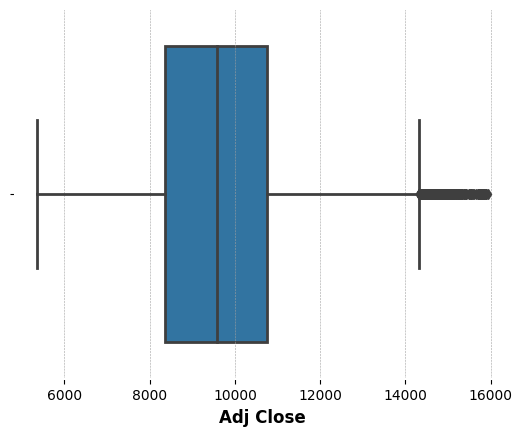

In [2186]:
sns.boxplot(x = 'Adj Close', data = df_train)

###Test

In [2187]:
#Sin nulos
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   test_index  726 non-null    int64  
 1   Date        726 non-null    object 
 2   Open        726 non-null    float64
 3   High        726 non-null    float64
 4   Low         726 non-null    float64
 5   Close       726 non-null    float64
 6   Adj Close   726 non-null    float64
 7   Volume      726 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 45.5+ KB


In [2188]:
#Cambiamos columna 'Date' a tipo fecha
df_test['Date'] = pd.to_datetime(df_test['Date'], format= '%Y-%M-%d')

In [2189]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 726 entries, 0 to 725
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   test_index  726 non-null    int64         
 1   Date        726 non-null    datetime64[ns]
 2   Open        726 non-null    float64       
 3   High        726 non-null    float64       
 4   Low         726 non-null    float64       
 5   Close       726 non-null    float64       
 6   Adj Close   726 non-null    float64       
 7   Volume      726 non-null    float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 45.5 KB


In [2190]:
df_test.set_index('test_index', inplace= True)

In [2191]:
df_test.rename_axis('index', inplace = True)

In [2192]:
#Hacemos los cambios en las columnas: eliminamos 'Close' y creamos 'Dif_Open_Close' y 'MA3'

In [2193]:
df_test.drop('Close', axis = 1, inplace= True)

In [2194]:
df_test['Dif_Open_Close'] = (df_test['Adj Close'] - df_test['Open'])

In [2195]:
df_test['MA3'] = df_test['Adj Close'].rolling (3).mean()

In [2196]:
df_train.fillna(method = 'backfill', inplace = True)

In [2197]:
df_test.head()

,Date,Open,High,Low,Adj Close,Volume,Dif_Open_Close,MA3
index,,,,,,,,
6557,2019-01-05 00:06:00,9136.799805,9173.400391,9095.000000,9150.500000,158753000.0,13.700195,NaN
6558,2019-01-06 00:06:00,9169.200195,9246.200195,9136.700195,9169.200195,212720900.0,0.000000,NaN
6559,2019-01-07 00:06:00,9186.700195,9261.400391,9185.700195,9236.099609,150664700.0,49.399414,9185.266601
6560,2019-01-10 00:06:00,9284.200195,9302.200195,9248.099609,9294.099609,102323700.0,9.899414,9233.133138
6561,2019-01-11 00:06:00,9288.599609,9332.500000,9273.400391,9282.099609,144701200.0,-6.500000,9270.766276


###Tweets

In [2198]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9801 entries, 0 to 9800
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweetDate  9799 non-null   object
 1   handle     9798 non-null   object
 2   text       9797 non-null   object
dtypes: object(3)
memory usage: 229.8+ KB


In [2199]:
df_tweets.isnull().sum()

tweetDate    2
handle       3
text         4
dtype: int64

In [2200]:

df_tweets.head()

,tweetDate,handle,text
0,Sat Apr 09 14:47:45 +0000 2022,abelac62,He hecho el repaso de todos los componentes de...
1,Thu Apr 07 19:14:36 +0000 2022,LluisPerarnau,Els projectes que han presentat les empreses d...
2,Mon Apr 04 16:48:45 +0000 2022,Pegaso121080,"Por si no lo has visto, o no lo encuentras en ..."
3,Tue Apr 05 07:23:16 +0000 2022,zonavalue,📈 #BOLSA: El #Ibex35 abre en 🟢 \n\n🇪🇸 #Ibex35 ...
4,Thu Mar 31 16:07:43 +0000 2022,EPeconomia,"El #Ibex35 retrocede un 0,4% en marzo y un 3,0..."


#Modelo

In [2201]:
df_train.reset_index(inplace= True)

In [2202]:
df_train.head()

,Date,Open,High,Low,Adj Close,Volume,Target,Dif_Open_Close,MA3
0,2000-01-24 00:07:00,10879.599609,10924.400391,10812.500000,10831.489258,5545600.0,0,-48.110351,10763.289063
1,2000-01-25 00:07:00,10831.500000,10842.200195,10703.400391,10714.588867,7368000.0,0,-116.911133,10763.289063
2,2000-01-26 00:07:00,10722.599609,10840.200195,10722.599609,10743.789063,6643800.0,0,21.189454,10763.289063
3,2000-01-27 00:07:00,10743.799805,10856.599609,10713.400391,10725.989258,6989400.0,0,-17.810547,10728.122396
4,2000-01-28 00:07:00,10726.000000,10735.000000,10526.799805,10559.989258,6670000.0,1,-166.010742,10676.589193


In [2203]:
df_train_listo = df_train.drop(['Date', 'Target'], axis = 1)

In [2204]:
df_train_listo.rename_axis('index', inplace = True)

In [2205]:
df_train_listo.head()

,Open,High,Low,Adj Close,Volume,Dif_Open_Close,MA3
index,,,,,,,
0,10879.599609,10924.400391,10812.500000,10831.489258,5545600.0,-48.110351,10763.289063
1,10831.500000,10842.200195,10703.400391,10714.588867,7368000.0,-116.911133,10763.289063
2,10722.599609,10840.200195,10722.599609,10743.789063,6643800.0,21.189454,10763.289063
3,10743.799805,10856.599609,10713.400391,10725.989258,6989400.0,-17.810547,10728.122396
4,10726.000000,10735.000000,10526.799805,10559.989258,6670000.0,-166.010742,10676.589193


In [2206]:
accuracy= []
recall =[]
roc_auc= []
precision = []
f1= []
X= df_train_listo
y= df_train['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [2207]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)

(3379, 7)
(3379,)
(1449, 7)


Decision Tree

In [2208]:
model_dct =  RandomForestClassifier(random_state=0)
model_dct.fit(X_train, y_train)
y_pred = model_dct.predict(X_test)
accuracy.append(round(accuracy_score(y_test, y_pred),5))
recall.append(round(recall_score(y_test, y_pred),5))
roc_auc.append(round(roc_auc_score(y_test, y_pred),5))
precision.append(round(precision_score(y_test, y_pred),5))
f1.append(round(f1_score(y_test, y_pred),5))

In [2209]:
print("Accuracy",(round(accuracy_score(y_test, y_pred),5)))
print("Recall",(round(recall_score(y_test, y_pred),5)))
print("Roc_auc",(round(roc_auc_score(y_test, y_pred),5)))
print("Precision",(round(precision_score(y_test, y_pred),5)))
print("F1",(round(f1_score(y_test, y_pred),5)))

Accuracy 0.5528
Recall 0.58675
Roc_auc 0.5513
Precision 0.56868
F1 0.57757


XGBoost

In [2210]:
model_xgb = xgb.XGBClassifier()

In [2211]:
model_xgb.fit(
    X = X_train, 
    y = y_train,
)
pred_xgb = model_xgb.predict(X_test)

In [2212]:
accuracy.append(round(accuracy_score(y_test, pred_xgb),5))
recall.append(round(recall_score(y_test, pred_xgb),5))
roc_auc.append(round(roc_auc_score(y_test, pred_xgb),5))
precision.append(round(precision_score(y_test, pred_xgb),5))
f1.append(round(f1_score(y_test, pred_xgb),5))

In [2213]:
print("Accuracy",(round(accuracy_score(y_test, pred_xgb),5)))
print("Recall",(round(recall_score(y_test, pred_xgb),5)))
print("Roc_auc",(round(roc_auc_score(y_test, pred_xgb),5)))
print("Precision",(round(precision_score(y_test, pred_xgb),5)))
print("F1",(round(f1_score(y_test, pred_xgb),5)))

Accuracy 0.54382
Recall 0.66093
Roc_auc 0.53868
Precision 0.55199
F1 0.60157


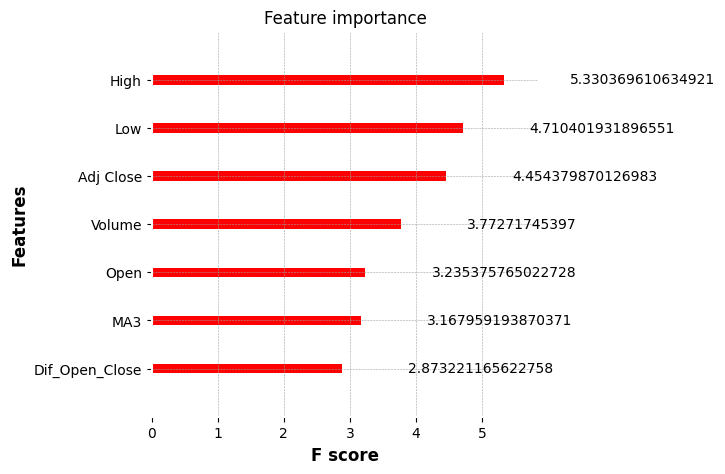

In [2214]:
from xgboost import plot_importance

importance = model_xgb.get_booster().get_score(importance_type = "gain")
importance = {k: v for k, v in sorted(importance.items(), key = lambda item: item[1])}

fig, ax = plt.subplots(figsize = (5, 5))
plot_importance(model_xgb, importance_type = "gain", ax = ax, color= 'red');

# Predecimos

In [2215]:
test_X = df_test.fillna(method ='backfill')

In [2216]:
test_X  = test_X.drop('Date', axis =1)

In [2217]:
test_X.head()

,Open,High,Low,Adj Close,Volume,Dif_Open_Close,MA3
index,,,,,,,
6557,9136.799805,9173.400391,9095.000000,9150.500000,158753000.0,13.700195,9185.266601
6558,9169.200195,9246.200195,9136.700195,9169.200195,212720900.0,0.000000,9185.266601
6559,9186.700195,9261.400391,9185.700195,9236.099609,150664700.0,49.399414,9185.266601
6560,9284.200195,9302.200195,9248.099609,9294.099609,102323700.0,9.899414,9233.133138
6561,9288.599609,9332.500000,9273.400391,9282.099609,144701200.0,-6.500000,9270.766276


In [2218]:
model_xgb.fit(
    X = X_train, 
    y = y_train,
)
prediction = model_xgb.predict(test_X)

In [2219]:
test_X['Target'] = predictions

In [2220]:
test_X.rename_axis('test_index', inplace = True)

In [2221]:
test_X.reset_index(inplace = True)

In [2222]:
test_X.head()

,test_index,Open,High,Low,Adj Close,Volume,Dif_Open_Close,MA3,Target
0,6557,9136.799805,9173.400391,9095.000000,9150.500000,158753000.0,13.700195,9185.266601,1
1,6558,9169.200195,9246.200195,9136.700195,9169.200195,212720900.0,0.000000,9185.266601,1
2,6559,9186.700195,9261.400391,9185.700195,9236.099609,150664700.0,49.399414,9185.266601,1
3,6560,9284.200195,9302.200195,9248.099609,9294.099609,102323700.0,9.899414,9233.133138,1
4,6561,9288.599609,9332.500000,9273.400391,9282.099609,144701200.0,-6.500000,9270.766276,1


In [2223]:
test_X[["test_index", "Target"]].to_csv("predictions.csv", index = False)

In [2224]:
test_X[["test_index", "Target"]].to_json("predictions.json")